## __Font Setting__

In [1]:
import matplotlib.font_manager as fm
import matplotlib
font_location='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'
font_name=fm.FontProperties(fname=font_location).get_name()
#print(font_name)
matplotlib.rc('font', family=font_name)
#matplotlib.matplotlib_fname()

## DART API connect

In [2]:
# -*- coding: utf-8 -*-
import dart_fss as dart
api_key='fcb0b5b6663759936ad3c7dbf488b1ead9459fd0'
dart.dart_set_api_key(api_key)
crp_list=dart.get_crp_list()
samsung_electronics=crp_list.find_by_name('SK이노베이션')[0]

## Download Reports from DART

In [3]:
#fs_annual = samsung_electronics.get_financial_statement(start_dt='20180101', report_tp='quarter')

In [4]:
#print(fs_annual)

In [5]:
is_annual = samsung_electronics.get_financial_statement(start_dt='20080101', fs_tp='is')

Download: 34.0KB [00:00, 172KB/s]
Extracting is-annual: 100%|██████████| 13/13 [00:17<00:00,  1.48s/page]


In [6]:
#display(is_annual)

In [7]:
display(is_annual[:]['label_ko'])

0                                    매출액
1                                   매출원가
2                                  매출총이익
3                                판매비와관리비
4                               영업이익(손실)
5                   금융수익-유효이자율법에 따른 이자수익
6                                금융수익-기타
7                                   금융수익
8                                   금융원가
9                                  지분법손익
10                               기타영업외수익
11                               기타영업외비용
12                       법인세비용차감전순이익(손실)
13                       계속영업손익법인세비용(효익)
14                            계속영업이익(손실)
15                            중단영업이익(손실)
16                           연결당기순이익(손실)
17                             지배기업소유주지분
18                                 비지배지분
19                              연결기타포괄손익
20               후속적으로 당기손익으로 재분류되지 않는항목
21                 기타포괄손익-공정가치측정금융자산평가손익
22                         확정급여제도의 재측정요소
23                              해외사업환산손익
24             후

## Get '영업손실' Index

In [8]:
check_table=is_annual[:]['label_ko']=='연결당기순이익(손실)'
index=check_table[check_table].index[0]

## Get Years' Value Stored Location

In [9]:
column_index=0
for column in is_annual.columns:
    if column.startswith('['):
        break
    column_index=column_index+1

## Get Area Interested in

In [10]:
is_annual_modi=is_annual.iloc[index][column_index:]

## Unit Change from '원' to '조'

In [11]:
is_annual_modi=is_annual_modi[:]/1000000000000

## Draw Graph

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

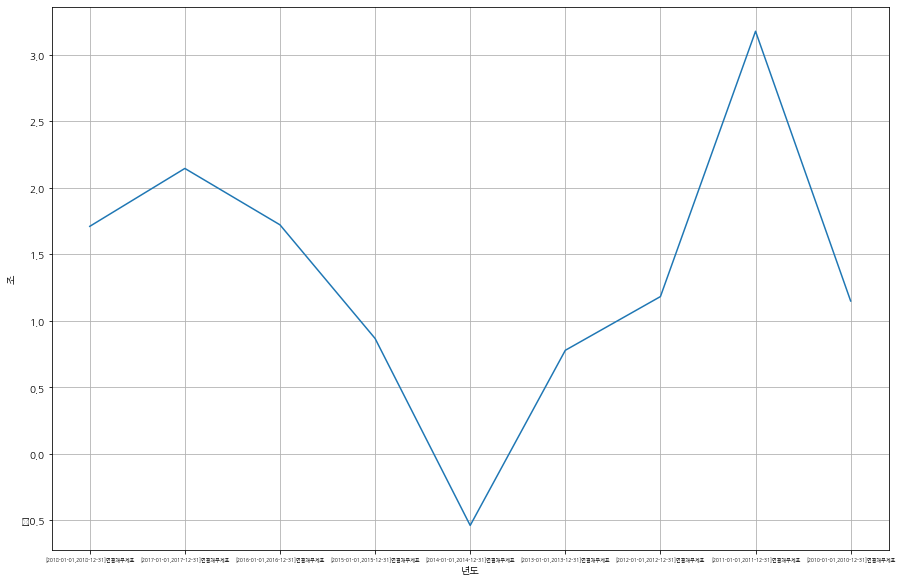

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(is_annual_modi)
plt.xlabel('년도')
plt.ylabel('조')
plt.grid(True)
plt.xticks(size=5)

#is_annual_modi.plot(kind='line', title='test',figsize=(15,10) )